In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import plotly.express as ex
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


In [3]:
# Function for confusion matrix
def confusion_matrix_visualization(model_name, color_seq):
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2, in
              zip(group_names, group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot = labels, fmt = '' , cmap = color_seq)

    ax.set_title('Confusion Matrix for ' + model_name + ' Classifier')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

In [4]:
# Load dataset
df = pd.read_csv("D:/Hack_sert/Downsampled_data.csv")
#df = df.fillna(df.mean())
#print(np.shape(df))
#print(df.head())
# Impute Missing Values with Label Matching Mean
# Impute Missing Values with Label Matching Mean
for col in ['Sulfate','ph','Trihalomethanes']:
    missing_label_0 = df.query('Potability == 0')[col][df[col].isna()].index
    df.loc[missing_label_0,col] = df.query('Potability == 0')[col][df[col].notna()].mean()

    missing_label_1 = df.query('Potability == 1')[col][df[col].isna()].index
    df.loc[missing_label_1,col] = df.query('Potability == 1')[col][df[col].notna()].mean()            
                                                                   
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [5]:
# Splititng Train and Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)


 <h1>Standardization</h1>
<p>Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.</p>

<p>Here’s the formula for standardization:</p>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Stand_eq.gif">
<p>where µ is the mean of the feature values and σ is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.</p>




In [6]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Logistic Regression</h2>
<p>Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.Logistic regression transforms its output using the logistic sigmoid function to return a probability value</p>
<p>Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.</p>
<p>Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.</p>
    Logistic regression hypothesis expectation </p>
<img src = "https://miro.medium.com/max/446/1*GnceHPIeThNShGSmYzE4eA.png">
<p>The Hypothesis of logistic regression,</p>
<img src = "https://miro.medium.com/max/1046/1*l59BUnPwWHMf1H-GNxgZHQ.png" width="300" height="100">



In [7]:
# ....Training Logistic Regression model..... 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [8]:
# Confusion matrix for Logistic Regression Classifier
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Logistic Regression Classifier model\n")
print("Confusion Matrix for Logistic Regression Classifier model\n", cm)
print("\n\nAccuracy Score for Logistic Regression Classifier model\n", accuracy_score(y_test, y_pred))


``````````````````````````````````````````````````````

Logistic Regression Classifier model

Confusion Matrix for Logistic Regression Classifier model
 [[139 124]
 [107 142]]


Accuracy Score for Logistic Regression Classifier model
 0.548828125


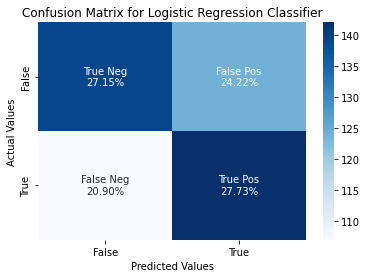

Train Score Logistic Regression: 0.549412915851272
Test Score Logistic Reegression: 0.548828125


In [9]:
confusion_matrix_visualization('Logistic Regression', 'Blues')

print("Train Score Logistic Regression:", classifier.score(X_train,y_train))
print("Test Score Logistic Reegression:", classifier.score(X_test,y_test))

In [10]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



K-Fold Cross Validation
Accuracy: 53.77 %
Standard Deviation: 2.60 %


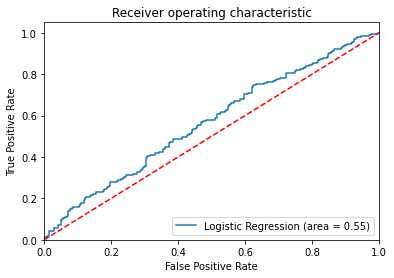

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


<h3>Decision trees</h3>
<p>Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.Decision trees can perform both classification and regression tasks</p>
<p>The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.</p>


In [12]:
# Training Decision Tree classifier  model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Decision Tree classifier model\n")
print("Confusion Matrix for Decision Tree classifier model\n", cm)
print("\n\nAccuracy Score for Decision Tree classifier model\n", accuracy_score(y_test, y_pred))


``````````````````````````````````````````````````````

Decision Tree classifier model

Confusion Matrix for Decision Tree classifier model
 [[258   5]
 [  1 248]]


Accuracy Score for Decision Tree classifier model
 0.98828125


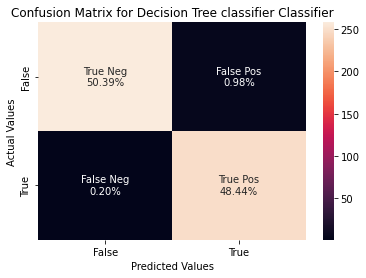

Train Score for Decision Tree: 1.0
Test Score for Decision Tree: 0.98828125


In [14]:
confusion_matrix_visualization('Decision Tree classifier', 'rocket')

print("Train Score for Decision Tree:", classifier.score(X_train,y_train))
print("Test Score for Decision Tree:", classifier.score(X_test,y_test))

In [15]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))





K-Fold Cross Validation
Accuracy: 99.51 %
Standard Deviation: 0.38 %


<h4>k-nearest neighbors (KNN)</h4>
<p>The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.</p>
<p>The training examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.</p>
<p>The KNN Algorithm
1.Load the data<br>
2.Initialize K to your chosen number of neighbors<br>
3. For each example in the data<br>
3.1 Calculate the distance between the query example and the current example from the data.<br>
3.2 Add the distance and the index of the example to an ordered collection.<br>
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances<br>
5. Pick the first K entries from the sorted collection<br>
6. Get the labels of the selected K entries<br>
7. If regression, return the mean of the K labels<br>
8. If classification, return the mode of the K labels</p>


In [16]:
# ....Training K-NN model.... 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("K-NN Classifier model\n")
print("Confusion Matrix for K-NN Classifier model\n",cm)
print("\n\nAccuracy Score for K-NN Classifier model\n", accuracy_score(y_test, y_pred)) 



``````````````````````````````````````````````````````

K-NN Classifier model

Confusion Matrix for K-NN Classifier model
 [[187  76]
 [106 143]]


Accuracy Score for K-NN Classifier model
 0.64453125


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("K-NN Classifier model\n")
print("Confusion Matrix for K-NN Classifier model\n",cm)
print("\n\nAccuracy Score for K-NN Classifier model\n", accuracy_score(y_test, y_pred)) 


``````````````````````````````````````````````````````

K-NN Classifier model

Confusion Matrix for K-NN Classifier model
 [[187  76]
 [106 143]]


Accuracy Score for K-NN Classifier model
 0.64453125


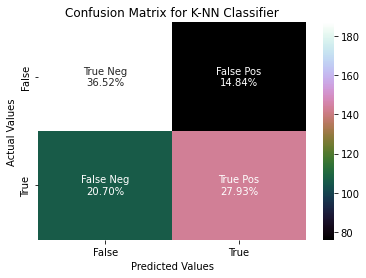

Train Score K-NN: 0.6912915851272016
Test Score K-NN: 0.64453125


In [18]:
confusion_matrix_visualization('K-NN', 'cubehelix')

print("Train Score K-NN:", classifier.score(X_train,y_train))
print("Test Score K-NN:", classifier.score(X_test,y_test))

In [19]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


K-Fold Cross Validation
Accuracy: 62.03 %
Standard Deviation: 2.23 %


<h5>The Random Forest Classifier</h5>
<p>Random forest,consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.</p>
<p>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.</p>
<img src ="https://imgs.search.brave.com/A4isyTogtJ3pON9Cy_-56W2nYjy-iWvctF5CsCJi-Uk/rs:fit:835:225:1/g:ce/aHR0cHM6Ly90c2Uz/Lm1tLmJpbmcubmV0/L3RoP2lkPU9JUC41/OGYxQ1o4TTRpbDBP/WllnMm9STjR3SGFF/TiZwaWQ9QXBp">

In [20]:
# .....Training Random Forest classifier  model.....
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [21]:
# Confusion matrix for Random Forest classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Random Forest Classifier Model\n")
print("Confusion Matrix for Random Forest classifier model\n",cm)
print("\n\nAccuracy Score for Random Forest classifier model\n", accuracy_score(y_test, y_pred))





``````````````````````````````````````````````````````

Random Forest Classifier Model

Confusion Matrix for Random Forest classifier model
 [[228  35]
 [ 50 199]]


Accuracy Score for Random Forest classifier model
 0.833984375


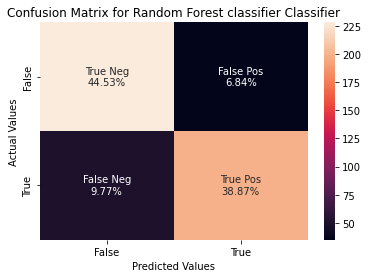

Train Score for Random Forest classifier: 0.9921722113502935
Test Score for Random Forest classifier: 0.833984375


In [22]:
confusion_matrix_visualization('Random Forest classifier', 'rocket')

print("Train Score for Random Forest classifier:", classifier.score(X_train,y_train))
print("Test Score for Random Forest classifier:", classifier.score(X_test,y_test))


In [23]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))




K-Fold Cross Validation
Accuracy: 84.15 %
Standard Deviation: 1.78 %


In [24]:
# .....Training Naive Bayes model..... 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [25]:
# Confusion matrix for Naive Bayes Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Naive Bayes Classifier model\n")
print("Confusion Matrix for Naive Bayes Classifier model\n",cm)
print("\n\nAccuracy Score for Naive Bayes Classifier model\n", accuracy_score(y_test, y_pred))



``````````````````````````````````````````````````````

Naive Bayes Classifier model

Confusion Matrix for Naive Bayes Classifier model
 [[173  90]
 [124 125]]


Accuracy Score for Naive Bayes Classifier model
 0.58203125


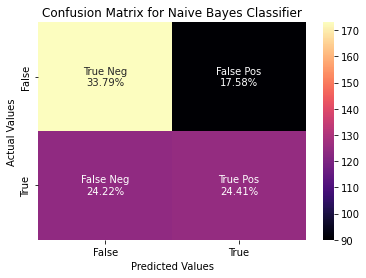

Train Score for Naive Bayes: 0.5924657534246576
Test Score for Naive Bayes: 0.58203125


In [26]:
confusion_matrix_visualization('Naive Bayes', 'magma')

print("Train Score for Naive Bayes:", classifier.score(X_train,y_train))
print("Test Score for Naive Bayes:", classifier.score(X_test,y_test))


In [27]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



K-Fold Cross Validation
Accuracy: 57.98 %
Standard Deviation: 2.13 %


In [28]:
# .....Training SVM model.....
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [29]:
# Confusion matrix for SVM Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("SVM Classifier model\n")
print("Confusion Matrix for SVM Classifier model\n",cm)
print("\n\nAccuracy Score for SVM Classifier model\n", accuracy_score(y_test, y_pred)) 



``````````````````````````````````````````````````````

SVM Classifier model

Confusion Matrix for SVM Classifier model
 [[141 122]
 [107 142]]


Accuracy Score for SVM Classifier model
 0.552734375


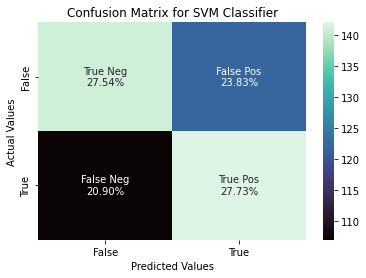

Train Score SVM: 0.5459882583170255
Test Score SVM: 0.552734375


In [30]:
confusion_matrix_visualization('SVM', 'mako')

print("Train Score SVM:", classifier.score(X_train,y_train))
print("Test Score SVM:", classifier.score(X_test,y_test))


In [31]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



K-Fold Cross Validation
Accuracy: 53.33 %
Standard Deviation: 3.59 %


In [32]:
# .....Training Kernel SVM model.....
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [33]:
# Confusion matrix for Kernel SVM Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Kernel SVM Classifier model\n")
print("Confusion Matrix for Kernel SVM Classifier model\n",cm)
print("\n\nAccuracy Score for kernel SVM Classifier model\n", accuracy_score(y_test, y_pred)) 



``````````````````````````````````````````````````````

Kernel SVM Classifier model

Confusion Matrix for Kernel SVM Classifier model
 [[182  81]
 [ 79 170]]


Accuracy Score for kernel SVM Classifier model
 0.6875


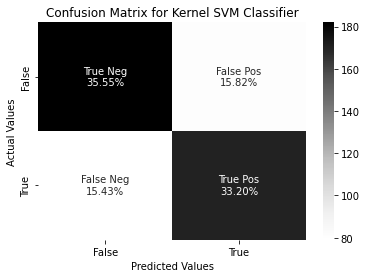

Train Score for Kernel SVM: 0.7558708414872799
Test Score for Kernel SVM: 0.6875


In [34]:
confusion_matrix_visualization('Kernel SVM', 'Greys')

print("Train Score for Kernel SVM:", classifier.score(X_train,y_train))
print("Test Score for Kernel SVM:", classifier.score(X_test,y_test))


In [35]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))




K-Fold Cross Validation
Accuracy: 65.36 %
Standard Deviation: 1.34 %


<h6>Artificial Neural Networks</h6>
<p>Artificial Neural networks (ANN) or neural networks are computational algorithms.
It intended to simulate the behavior of biological systems composed of “neurons”. 
ANNs are computational models inspired by an animal’s central nervous systems. 
It is capable of machine learning as well as pattern recognition. 
These presented as systems of interconnected “neurons” which can compute values from inputs.</p>
<p>ANN layers</p>
<p>Input layer – The activity of the input units represents the raw information that can feed into the network.<br>
Hidden layer – To determine the activity of each hidden unit. The activities of the input units and the weights on the connections between the input and the hidden units. There may be one or more hidden layers.<br>
Output layer – The behavior of the output units depends on the activity of the hidden units and the weights between the hidden and output units.</p>
    

In [36]:
# .....Training ANN model.....
ann = tf.keras.models.Sequential()

# Input layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

# Second hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

# Output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training ANN
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1),
                      y_test.reshape(len(y_test), 1)),
                     1))


Epoch 1/100
64/64 [==============================] - 3s 6ms/step - loss: 0.7093 - accuracy: 0.4985
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.6995 - accuracy: 0.4971
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5122
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5284
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.5352
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.5391
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.6852 - accuracy: 0.5514
Epoch 8/100
64/64 [==============================] - 0s 6ms/step - loss: 0.6834 - accuracy: 0.5563
Epoch 9/100
64/64 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5597
Epoch 10/100
64/64 [==============================] - 0s 5ms/step - loss: 0.6801 - accuracy: 0.5631
Epoch 11/

In [37]:
# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("ANN model\n")
print("Confusion Matrix for ANN model\n",cm)
print("\n\nAccuracy Score for ANN model\n", accuracy_score(y_test, y_pred)) 



``````````````````````````````````````````````````````

ANN model

Confusion Matrix for ANN model
 [[168  95]
 [ 92 157]]


Accuracy Score for ANN model
 0.634765625


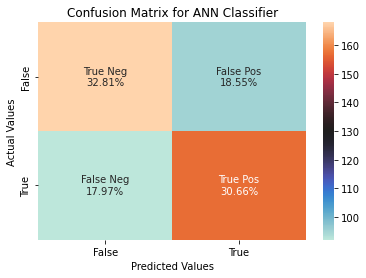

'\n#print("Train Score for ANN:", ann.score(X_train,y_train))\nprint("Test Score for ANN:", ann.ann["val_loss"](X_test,y_test))\n\n# K-Fold Cross Validation\naccuracies = cross_val_score(estimator = ann, X = X_train, y = y_train, cv = 10)\nprint("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))\nprint("Standard Deviation: {:.2f} %".format(accuracies.std()*100))\n'

In [38]:
confusion_matrix_visualization('ANN', 'icefire')

'''
#print("Train Score for ANN:", ann.score(X_train,y_train))
print("Test Score for ANN:", ann.ann["val_loss"](X_test,y_test))

# K-Fold Cross Validation
accuracies = cross_val_score(estimator = ann, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
'''

In [39]:
# ......Training XGBoost Classifier...
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Confusion matrix for XGBoost Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("XGBoost Classifier model\n")
print("Confusion Matrix for XGBoost Classifier model\n",cm)
print("\n\nAccuracy Score for XGBoost Classifier model\n", accuracy_score(y_test, y_pred)) 



C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
``````````````````````````````````````````````````````

XGBoost Classifier model

Confusion Matrix for XGBoost Classifier model
 [[168  95]
 [ 92 157]]


Accuracy Score for XGBoost Classifier model
 0.634765625


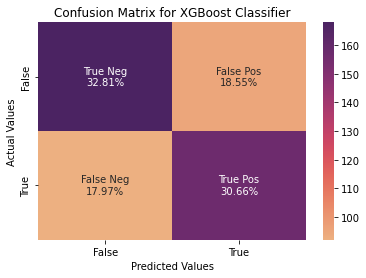

Train Score for XGBoost: 1.0
Test Score for XGBoost: 0.990234375


In [40]:
confusion_matrix_visualization('XGBoost', 'flare')

print("Train Score for XGBoost:", classifier.score(X_train,y_train))
print("Test Score for XGBoost:", classifier.score(X_test,y_test))


In [41]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[23:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

[23:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vijay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

K-Fold Cross Validation
Accuracy: 99.56 %
Standard Deviation: 0.34 %


In [42]:
#....Training Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators = 5, 
                           criterion = 'entropy',
                           max_features = 2)
classifier.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

In [43]:
# Confusion matrix for Extra Tree Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Extra Tree Classifier model\n")
print("Confusion Matrix for Extra Tree Classifier model\n",cm)
print("\n\nAccuracy Score for Extra Tree Classifier model\n", accuracy_score(y_test, y_pred)) 



``````````````````````````````````````````````````````

Extra Tree Classifier model

Confusion Matrix for Extra Tree Classifier model
 [[168  95]
 [ 92 157]]


Accuracy Score for Extra Tree Classifier model
 0.634765625


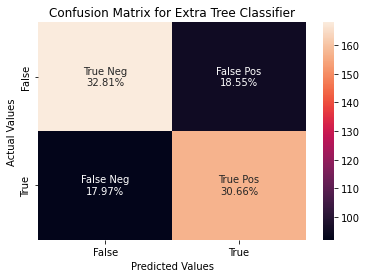

Train Score for Extra Tree: 1.0
Test Score for Extra Tree: 0.650390625


In [44]:
confusion_matrix_visualization('Extra Tree', 'rocket')

print("Train Score for Extra Tree:", classifier.score(X_train,y_train))
print("Test Score for Extra Tree:", classifier.score(X_test,y_test))


In [45]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



K-Fold Cross Validation
Accuracy: 66.19 %
Standard Deviation: 2.32 %


In [46]:
# Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),
                                n_estimators = 200)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [47]:
# Confusion matrix for AdaBoost Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("AdaBoost Classifier model\n")
print("Confusion Matrix for AdaBoost Classifier model\n",cm)
print("\n\nAccuracy Score for AdaBoost Classifier model\n", accuracy_score(y_test, y_pred)) 




``````````````````````````````````````````````````````

AdaBoost Classifier model

Confusion Matrix for AdaBoost Classifier model
 [[258   5]
 [  1 248]]


Accuracy Score for AdaBoost Classifier model
 0.98828125


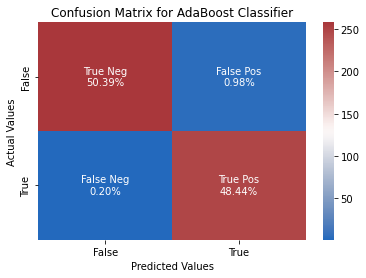

Train Score for AdaBoost: 1.0
Test Score for AdaBoost: 0.98828125


In [48]:
confusion_matrix_visualization('AdaBoost', 'vlag')

print("Train Score for AdaBoost:", classifier.score(X_train,y_train))
print("Test Score for AdaBoost:", classifier.score(X_test,y_test))

In [49]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



K-Fold Cross Validation
Accuracy: 99.51 %
Standard Deviation: 0.38 %


In [50]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(learning_rate = 0.1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [51]:
# Confusion matrix for Gradient Boostingt Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Gradient Boosting Classifier model\n")
print("Confusion Matrix for Gradient Boosting Classifier model\n",cm)
print("\n\nAccuracy Score for Gradient Boosting Classifier model\n", accuracy_score(y_test, y_pred)) 



``````````````````````````````````````````````````````

Gradient Boosting Classifier model

Confusion Matrix for Gradient Boosting Classifier model
 [[258   5]
 [  1 248]]


Accuracy Score for Gradient Boosting Classifier model
 0.98828125


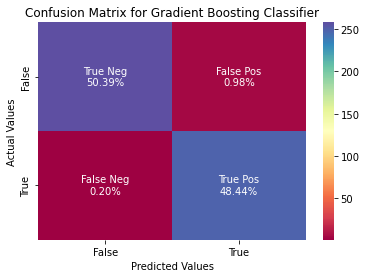

Train Score for Gradient Boosting: 1.0
Test Score for Gradient Boosting: 0.98828125


In [52]:
confusion_matrix_visualization('Gradient Boosting', 'Spectral')

print("Train Score for Gradient Boosting:", classifier.score(X_train,y_train))
print("Test Score for Gradient Boosting:", classifier.score(X_test,y_test))


In [53]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



K-Fold Cross Validation
Accuracy: 99.51 %
Standard Deviation: 0.38 %


In [54]:
# Light Gradient Boosting Machine Classifier
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [55]:
# Confusion matrix for Light Gradient Boosting Machine Classifier
cm = confusion_matrix(y_test, y_pred)
print("``````````````````````````````````````````````````````\n")
print("Light Gradient Boosting Machine Classifier model\n")
print("Confusion Matrix for Light Gradient Boosting Machine Classifier model\n",cm)
print("\n\nAccuracy Score for Light Gradient Boosting Machine Classifier model\n", accuracy_score(y_test, y_pred)) 



``````````````````````````````````````````````````````

Light Gradient Boosting Machine Classifier model

Confusion Matrix for Light Gradient Boosting Machine Classifier model
 [[252  11]
 [  1 248]]


Accuracy Score for Light Gradient Boosting Machine Classifier model
 0.9765625


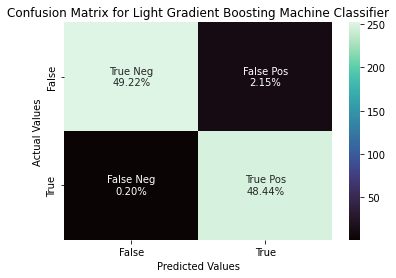

Train Score for Light Gradient Boosting Machine: 1.0
Test Score for Light Gradient Boosting Machine: 0.9765625


In [56]:
confusion_matrix_visualization('Light Gradient Boosting Machine', 'mako')

print("Train Score for Light Gradient Boosting Machine:", classifier.score(X_train,y_train))
print("Test Score for Light Gradient Boosting Machine:", classifier.score(X_test,y_test))


In [57]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("\nK-Fold Cross Validation\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



K-Fold Cross Validation
Accuracy: 98.38 %
Standard Deviation: 1.49 %
